In [20]:
import pandas as pd
player_personal_data = pd.read_csv('PlayerPersonalData.csv')

# Гистограмма возраста игроков

Гистограмма возраста укажет на доминирующий возраст.

Text(0, 0.5, 'Число игроков')

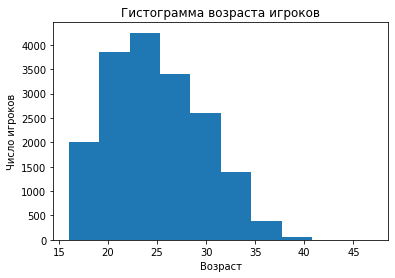

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.hist(player_personal_data['Age'])
plt.title('Гистограмма возраста игроков')
plt.xlabel('Возраст')
plt.ylabel('Число игроков')

Гистограмма возраста игроков показывает, что количество игроков моложе чем средний возраст всех игроков больше чем количества игроков старше среднего возраста.

# Зависимость зарплаты от возраста

In [3]:
player_personal_data['Wage'] = player_personal_data['Wage'].apply(lambda x: x.replace('€', '').replace('K', ''))

In [4]:
real_madrid_data = player_personal_data[player_personal_data['Club'] == 'Real Madrid CF']

Text(0.5, 1.0, 'График зависимости зарплаты игроков клуба Реал Мадрид')

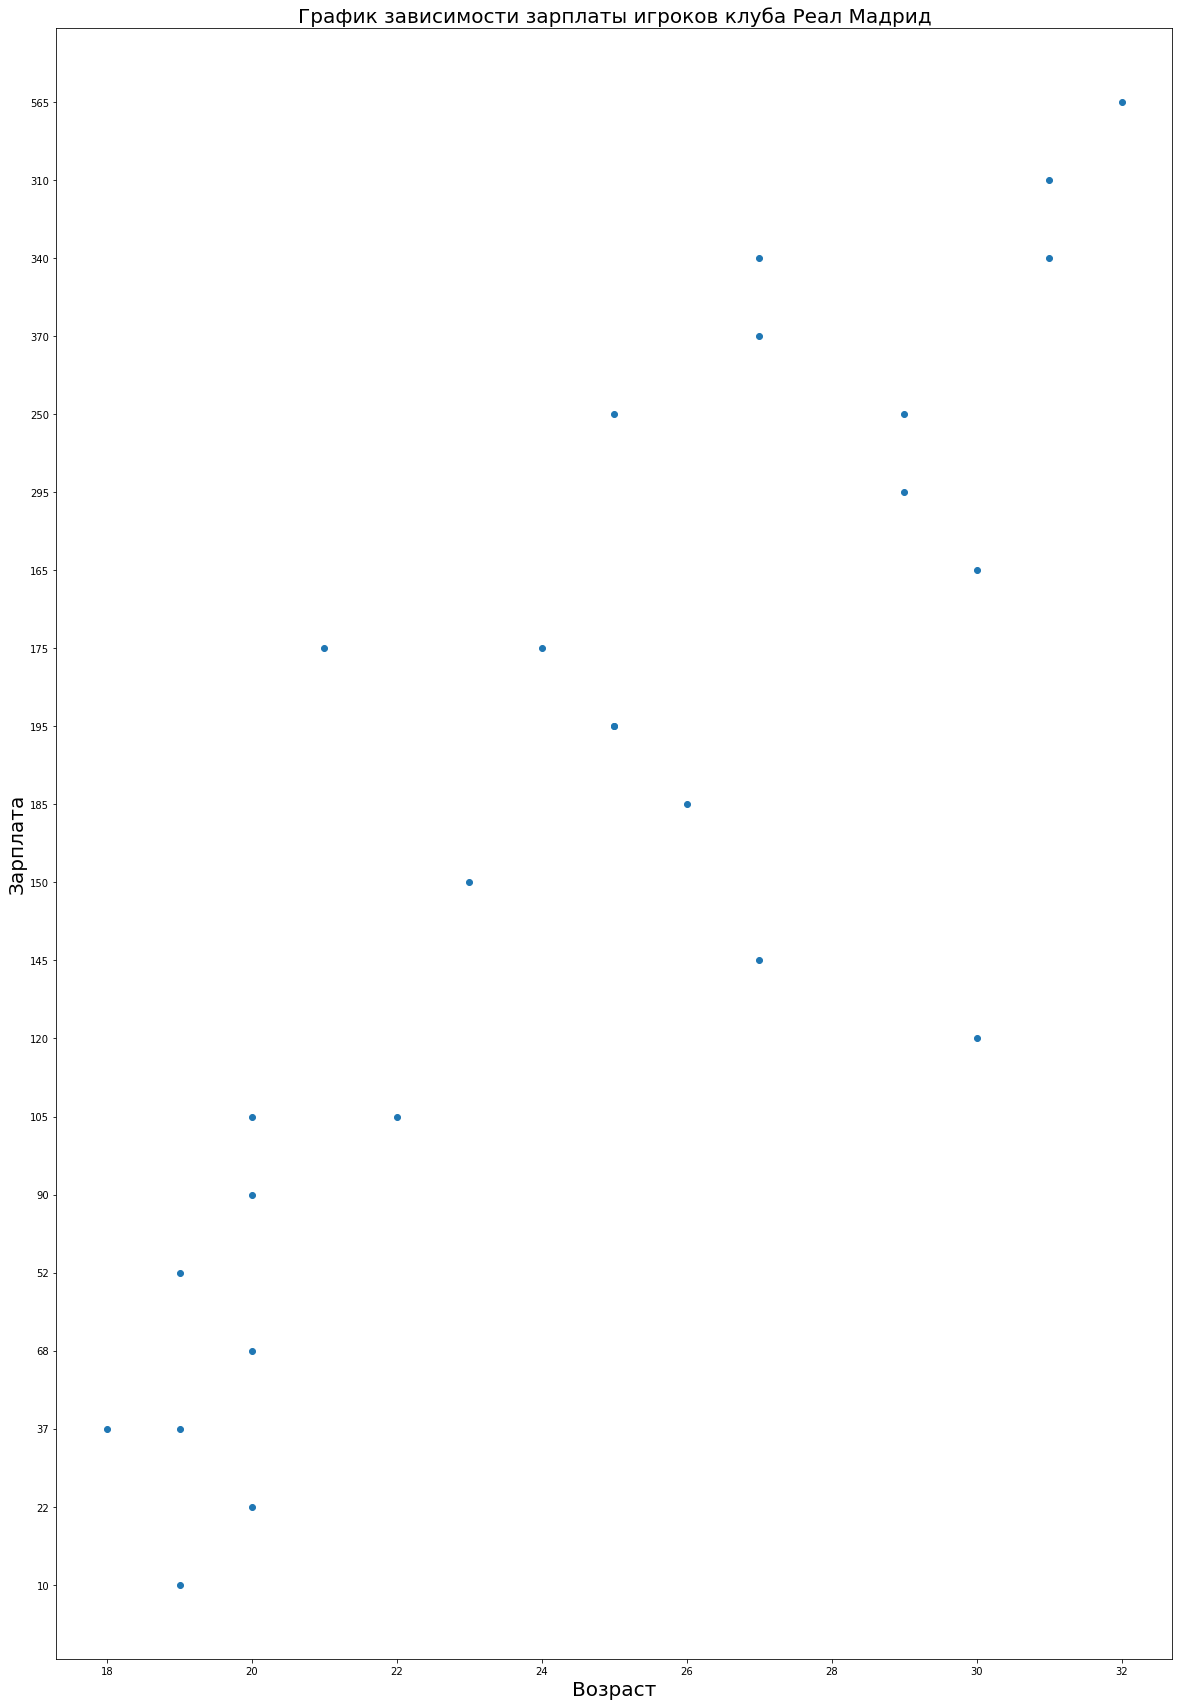

In [5]:
plt.rcParams["figure.figsize"] = (20,30)
plt.plot(real_madrid_data['Age'].iloc[::-1], real_madrid_data['Wage'].iloc[::-1], 'o')
plt.xlabel('Возраст', fontdict={'fontsize': 20})
plt.ylabel('Зарплата', fontdict={'fontsize': 20})
plt.title('График зависимости зарплаты игроков клуба Реал Мадрид', fontdict={'fontsize': 20})

График показывает что в большенстве случаев зарплаты более опытных игроков выше чем у молодых.

In [6]:
psg_data = player_personal_data[player_personal_data['Club'] == 'Paris Saint-Germain']

Text(0.5, 1.0, 'График зависимости зарплаты игроков клуба ПСЖ')

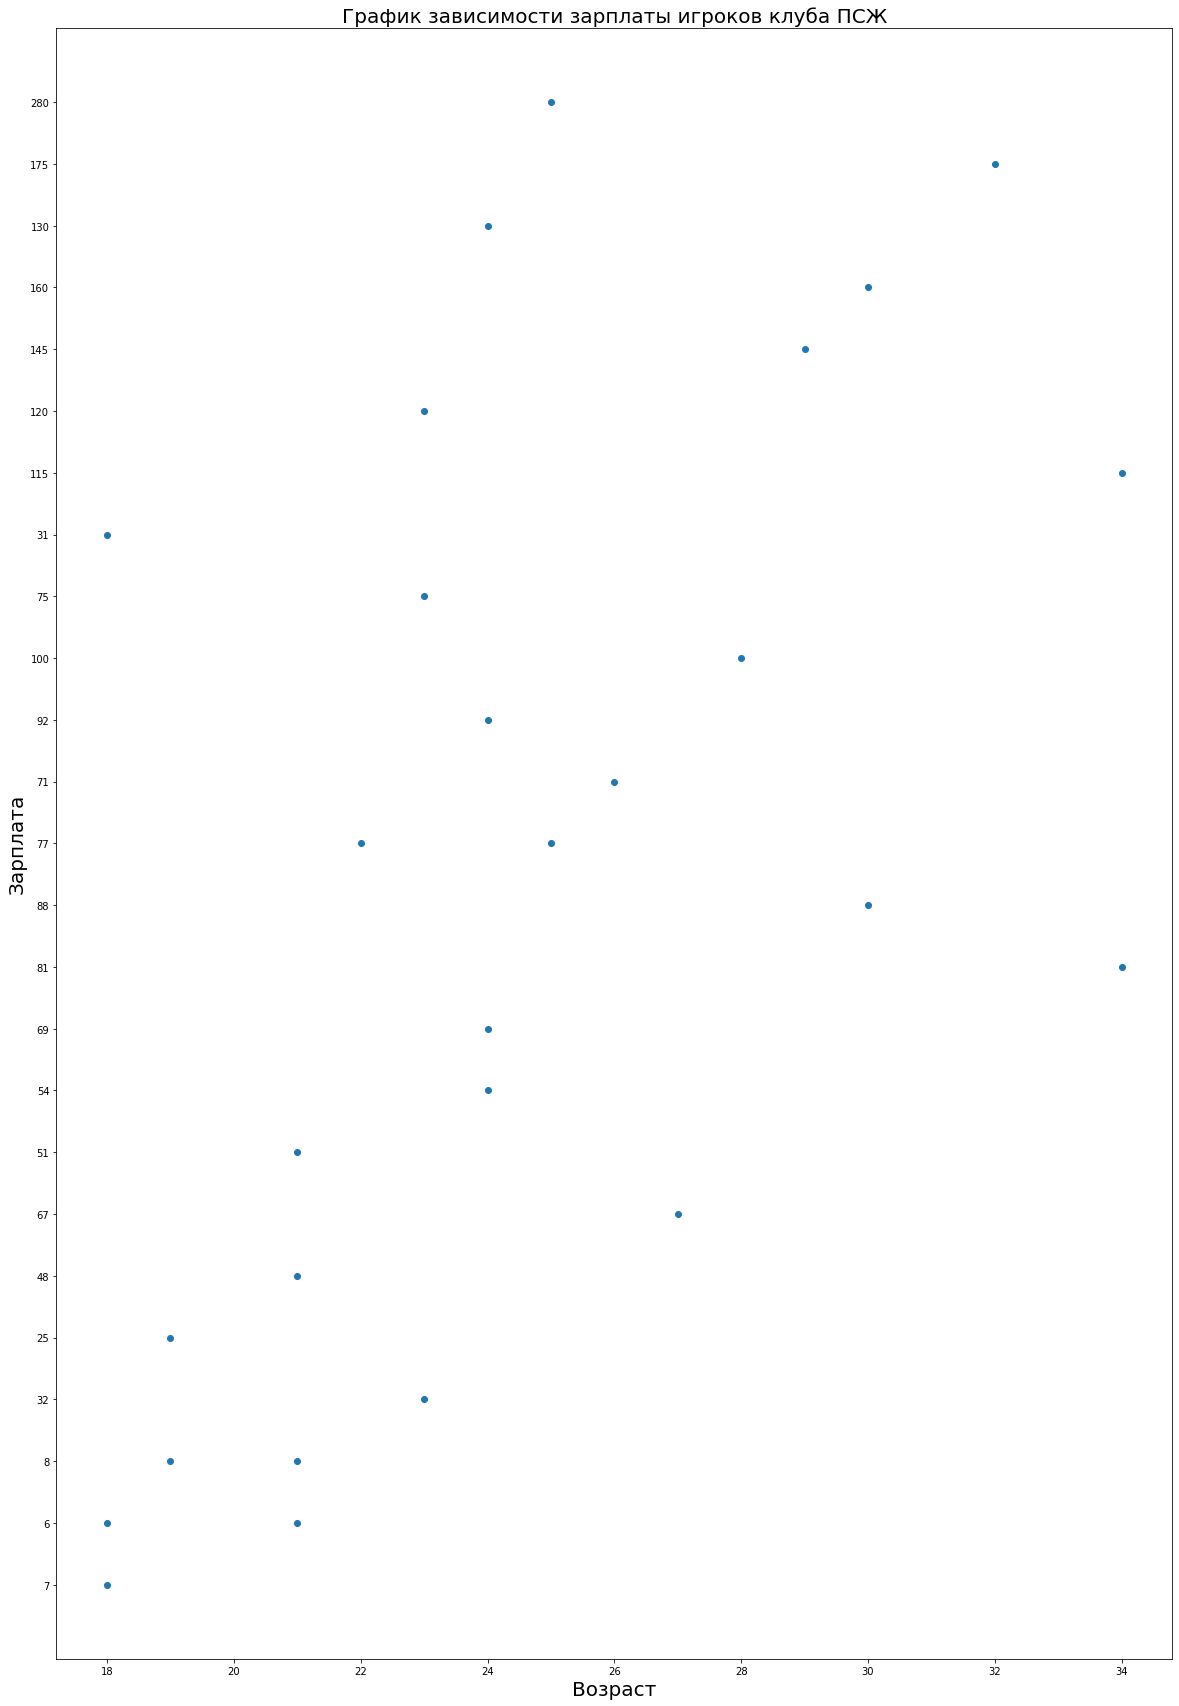

In [7]:
plt.rcParams["figure.figsize"] = (20,30)
plt.plot(psg_data['Age'].iloc[::-1], psg_data['Wage'].iloc[::-1], 'o')
plt.xlabel('Возраст', fontdict={'fontsize': 20})
plt.ylabel('Зарплата', fontdict={'fontsize': 20})
plt.title('График зависимости зарплаты игроков клуба ПСЖ', fontdict={'fontsize': 20})

График зависимости зарплаты игроков клуба ПСЖ показывает что не всегда зарплата прямо пропорциональна возрасту

In [63]:
!pip install plotly

     |████████████████████████████████| 26.5MB 8.5MB/s eta 0:00:01


In [8]:
import plotly.offline as offline
from plotly.graph_objs import *

In [9]:
offline.init_notebook_mode()

In [21]:
clubs_data = player_personal_data[(player_personal_data['Club'] == 'Real Madrid CF') | 
                                        (player_personal_data['Club'] == 'FC Barcelona') | 
                                        (player_personal_data['Club'] == 'FC Bayern Munich') | 
                                        (player_personal_data['Club'] == 'Paris Saint-Germain') |
                                        (player_personal_data['Club'] == 'Paris Saint-Germain') |
                                        (player_personal_data['Club'] == 'Manchester City') ]

In [22]:
def str2num(string):
    if 'M' in string:
        string = float(string.replace('M', '')) * 10 ** 6
        return string
    elif 'K' in string:
        string = float(string.replace('K', '')) * 10 ** 3
        return string

In [23]:
clubs_data['Wage'] = clubs_data['Wage'].apply(lambda x: str2num(x.replace('€', '')) )

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [24]:
wage_info = clubs_data.groupby(['Club'])['Wage'].sum()

In [29]:
bar_plot = Bar(x=wage_info.index, y=wage_info.values)

# Сравнение суммарных зарплат игроков топ клубов Европы

In [32]:
fig = Figure(data=[Bar(x=wage_info.index, y=wage_info.values)])
fig.update_layout(title='Сравнение суммарных зарплат игроков топ клубов Европы',
    xaxis_title="Клубы",
    yaxis_title="Сумма зарплат",
    )

График показывает что больше всех на зарплаты игроков тратят FC Barcelona и Real Madrid CF

# Сравнение суммарных стоимостей игроков топ клубов Европы

In [33]:
clubs_data['Value'] = clubs_data['Value'].apply(lambda x: str2num(x.replace('€', '')) )

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
value_info = clubs_data.groupby(['Club'])['Value'].sum()

In [35]:
fig = Figure(data=[Bar(x=value_info.index, y=value_info.values)])
fig.update_layout(title='Сравнение суммарных стоимостей игроков топ клубов Европы',
    xaxis_title="Клубы",
    yaxis_title="Суммарная стоимость игроков",
    )

График показывает самый дорогой состав у клуба Real Madrid CF

# Cредний performance

In [36]:
performance_info = player_personal_data.groupby(['Nationality'])['Overall'].mean()

In [38]:
fig = Figure(data=[Bar(name='Mean of Potential', x=performance_info.index, y=performance_info.values)])
fig.update_layout(title='Сравнение средних performance по странам',
    xaxis_title="Страны",
    yaxis_title="Cредний performance",
    )

В данном случае нельзя сказать что средний performance отображает достоверную картину т.к. в таблице приводится информация не о всех игроках, а о наиболее известных